## Background

In order to fully exploit the opportunities in Mobile, we need to understand how customers
are using Mobile devices, to help us to:
- Tailor the app and mobile website to the needs of our customers
- Ensure that we have the best selection of hotels available for Mobile users
- Target our marketing efforts appropriately

## Aims

Please make a note of, and/or resolve for, any data quality issues that you
encounter. Further information about the data is provided in the ‘further details’ section
below.
We would like you to analyse the data in the Excel spreadsheet and create a 15- minute
presentation and a file containing your workings. Please consider:
- What does the data suggest regarding how bookings differ by platform and region?
- Where are we seeing the most growth?
- Please use any other measures that you think will be insightful.
- What other data or information would you request to gain additional insight?

Before starting, I initally copied the original file "Dataset (Data Science- Analytics).xlsx" and saved it as a csv titled "expedia_bookings.csv" to be able to read the data using pandas

In [2]:
import pandas as pd

# Upload the dataset as a dataframe
booking_data = pd.read_csv("expedia_bookings.csv")

# Inspect
booking_data

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders,Unnamed: 9,Unnamed: 10
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,$-608,-3,NaN,NaN
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,$-512,-2,NaN,NaN
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60 days,Andorra,$103,1,NaN,NaN
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45 days,Argentina,$396,1,NaN,NaN
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30 days,Argentina,$373,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
73683,2017-W48,Mobile,Mobile Web,NaN,US,15-30 days,Vietnam,$748,6,NaN,NaN
73684,2017-W48,Mobile,Mobile Web,NaN,US,31-45 days,Vietnam,"$2,380",7,NaN,NaN
73685,2017-W48,Mobile,Mobile Web,NaN,US,46-60 days,Vietnam,$67,1,NaN,NaN
73686,2017-W48,Mobile,Mobile Web,NaN,US,8-14 days,Vietnam,$591,2,NaN,NaN


## Column Definitions

**Week**: The year and week that the booking took place. 2016-W45 is the week beginning 07/11/2016

**Mobile Indicator Name**: Type of device used - Either Mobile or Desktop

**Platform Type Name**: Type of device used to make the booking - Desktop computer, Mobile App (on a Smartphone or Tablet device), or our Mobile website (on a Smartphone or Tablet device)

**Super Region**: The region that the traveler originates from (North America, Asia-Pacific, Europe Middle East & Africa or Latin America)

**Country Name**: Country the traveler originates from

**Booking Window Group**: Refers to the number of days between the customer booking and checking into the hotel. E.g. if a customer booked a trip on January 1st and checked in on January 10th, the booking window would be 9 days

**Property Country**: The country in which the booked hotel is located

**Net Gross Booking Value**: The total $ amount that customers pay to Hotels.com for their hotel reservation. The value of cancelled bookings is removed

**Net Orders**: The total number of hotel bookings made - the number of bookings cancelled

Important Notes

Each row represents a group of people. Keep note that there may be more cancellations than bookings, or the value of cancellations may be higher than the value of bookings, which means that the Net Orders and Net Gross Booking value may be in minus.

It is also important to note that the booking value is rounded to the nearest dollar and empty values are '-'

From loking at the data, there are two extra columns with NaN values that we do not need. This error must have been due to changing the xlsx file to csv?

From face level inspection, we can also see that there are some NaN values in the Super Region Column.

In [3]:
# Delete the NaN columns
del booking_data['Unnamed: 9']
del booking_data['Unnamed: 10']

booking_data.head(5)

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,$-608,-3
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,$-512,-2
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60 days,Andorra,$103,1
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45 days,Argentina,$396,1
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30 days,Argentina,$373,1


In [4]:
# Further investigate if there are any other NaN values
booking_data.isna().any()

Week                             False
Mobile Indicator Name            False
Platform Type Name               False
Super Region                      True
Country Name                     False
Booking Window Group             False
Property Country                 False
 Net Gross Booking Value USD     False
Net Orders                       False
dtype: bool

In [5]:
# Count how many NaN values there are in teh Super Region Column
booking_data['Super Region'].isna().sum()

20265

In [6]:
# Does the column contain all the super regions we expect it to?
pd.unique(booking_data['Super Region'])

array(['APAC', 'EMEA', 'LATAM', nan], dtype=object)

I expect the super region column to have the following categories: 
- North America (NA)
- Asia-Pacific (APAC)
- Europe Middle East &amp (EMEA)
- Africa or Latin America (LATAM)

From what I can see, the data is missing North America (NA) regions being defined. However, we should still investigate this further to check whether other coutries outside of NA have an associated super region defined or not. This will show whether  all NaN values are are supposed to be NA.

In [7]:
# Look at the different countries and how many rows they are in
booking_data['Country Name'].value_counts()

US                20265
United Kingdom    14873
South Korea        9878
Norway             8604
Australia          7225
Hong Kong          6702
Brazil             6141
Name: Country Name, dtype: int64

In [8]:
# Look at which countries are not associated with a super region to double check
na_supers = booking_data[booking_data['Super Region'].isna()]

na_supers['Country Name'].value_counts()

US    20265
Name: Country Name, dtype: int64

Overall, there are the same number of rows with NaN values in the Super region column as rows that have US in the country name column. Furthermore, all NaN data have US as their country name and is not associated with any other super regions in the data.

Therefore, this confirms that all NaN values present in the super region column are meant to be North America (NA). 

In [9]:
# Fill all NaN values to be North America (NA)
booking_data['Super Region'].fillna('NA', inplace=True)

# Double check if all NaN values have been filled
booking_data['Super Region'].value_counts().head(10)

APAC     23805
EMEA     23477
NA       20265
LATAM     6141
Name: Super Region, dtype: int64

Create a new column to change the dates to week beginning. This will help up investigate the growth of bookings over time.

In [10]:
import datetime

# New column called week beginning (this may take a little longer to load due to the loop)
for lab, row in booking_data.iterrows():
    
    # Takes the 'Week' Column and finds the date beginning on that week
    booking_data.loc[lab,'Week Beginning'] = datetime.datetime.strptime(booking_data.loc[lab, 'Week'] + '-1', "%Y-W%W-%w")

# Inspect
booking_data.head(5)

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders,Week Beginning
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,$-608,-3,2016-11-07
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,$-512,-2,2016-11-07
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60 days,Andorra,$103,1,2016-11-07
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45 days,Argentina,$396,1,2016-11-07
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30 days,Argentina,$373,1,2016-11-07


Remove the 'days' section of the booking windows to remove unnecessary data and convert the Net Booking Value USD to integers by first removing the unnecessary characters. Then also change the values that are accidently assigned '-' or '-0'.

In [18]:
# Standardise the window group column by removing the 'days'
booking_data['Booking Window Group'] = booking_data['Booking Window Group'].str.replace(' days', '')

# Take the dollar sign away from the booking value and the leading and trailing whitespaces
booking_data[' Net Gross Booking Value USD '] = booking_data[' Net Gross Booking Value USD '].str.replace('$', '', regex=False).str.strip()
booking_data[' Net Gross Booking Value USD '] = booking_data[' Net Gross Booking Value USD '].str.replace(',', '', regex=False)

# Convert the -0 values to 0 (These were originally negative floats that were rounded to 0)
booking_data[' Net Gross Booking Value USD '] = booking_data[' Net Gross Booking Value USD '].replace(['-', '-0'], '0')

In [19]:
# Convert the Net Gross Booking Value to integers instead of strings
booking_data[' Net Gross Booking Value USD '] = booking_data[' Net Gross Booking Value USD '].astype('int')

# Check if all columns have the correct data type for further analysis
booking_data.dtypes

Week                                     object
Mobile Indicator Name                    object
Platform Type Name                       object
Super Region                             object
Country Name                             object
Booking Window Group                     object
Property Country                         object
 Net Gross Booking Value USD              int32
Net Orders                                int64
Week Beginning                   datetime64[ns]
dtype: object

In [20]:
# Inspect before movingh on to analysis
booking_data.head(10)

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders,Week Beginning
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14,Algeria,-608,-3,2016-11-07
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90,Andorra,-512,-2,2016-11-07
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60,Andorra,103,1,2016-11-07
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45,Argentina,396,1,2016-11-07
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30,Argentina,373,1,2016-11-07
5,2016-W45,Desktop,Desktop,APAC,Australia,8-14,Argentina,201,1,2016-11-07
6,2016-W45,Desktop,Desktop,APAC,Australia,+90,Argentina,132,-1,2016-11-07
7,2016-W45,Desktop,Desktop,APAC,Australia,4-7,Argentina,105,1,2016-11-07
8,2016-W45,Desktop,Desktop,APAC,Hong Kong,31-45,Argentina,209,1,2016-11-07
9,2016-W45,Desktop,Desktop,APAC,Hong Kong,46-60,Argentina,139,1,2016-11-07


## How do bookings differ by platform?

Aim to investigate the differences in:
- how many bookings are made
- much money is made
- popular booking windows
- popular destinations
- where do they mainly originate from

<AxesSubplot:xlabel='Platform Type Name', ylabel='Net Orders'>

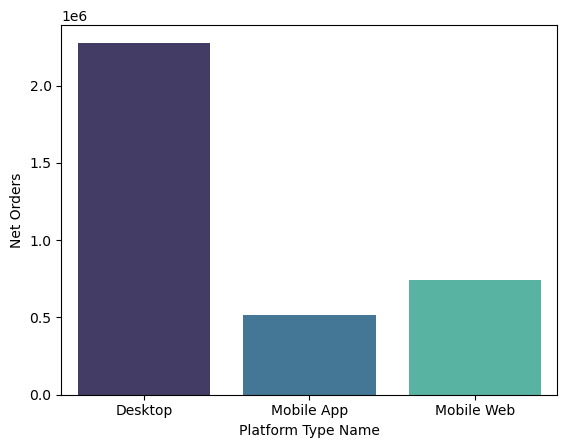

In [21]:
# How many bookings are made per platform?
import seaborn as sns
import matplotlib.pyplot as plt

platform_orders = booking_data.pivot_table(values = 'Net Orders', index = 'Platform Type Name', aggfunc=sum).reset_index()
sns.barplot(data = platform_orders, x = 'Platform Type Name', y = 'Net Orders', palette = 'mako')

Most bookings are made on desktop, trailing behind is mobile web and then mobile app.

The graphs above show that when separated, most bookings from our data are made on desktop. However, overall there are more bookings made on mobile than desktop when combining the two different platforms.

<AxesSubplot:xlabel='Platform Type Name', ylabel=' Net Gross Booking Value USD '>

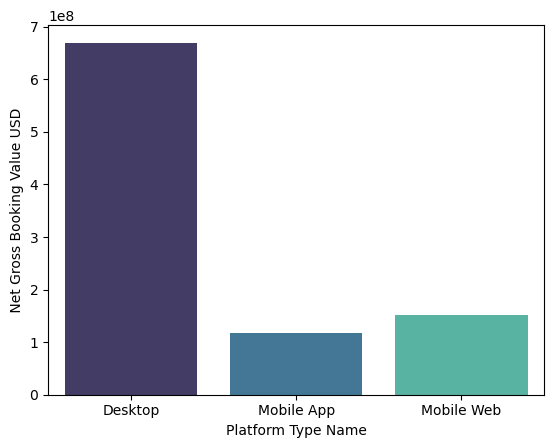

In [26]:
# How much revenue is made for each platform
platform_revenue = booking_data.pivot_table(values = ' Net Gross Booking Value USD ', index = 'Platform Type Name', aggfunc=sum).reset_index()

sns.barplot(data = platform_revenue, x = 'Platform Type Name', y = ' Net Gross Booking Value USD ', palette = 'mako')

The net orders and money spent both match the same patterns, where most customers purchase bookings on the desktop.

In [77]:
# Create list with the different platform names to use in for loop
platform_names = list(booking_data['Platform Type Name'].unique())

# Initialise a list to append in the for loop with the different datasets
platform_dfs = []

# Create a list of dataframes, where each data frame is filtered for the different Platform Types
for platform in platform_names:
    platform_data = booking_data[booking_data['Platform Type Name'] == platform]
    platform_dfs.append(platform_data)

# Get the top 3 windows for each platform type
windowplatform_rankings = []

for df in platform_dfs:
    window_platform = pd.DataFrame(df.pivot_table(index = 'Booking Window Group', values = 'Net Orders', aggfunc = sum).reset_index())
    window_platform.columns = ['Window', 'Net orders']
    
    # Calculate the sum of total net bookings made for each platform and calculate percentages for new column
    total_bookings = sum(window_platform['Net Orders'])
    window_platform['Percentage'] = window_platform['Net Orders'] / total_bookings
    
    windowplatform_rankings.append(window_platform.sort_values('Net Orders', ascending = False))

# Print the top 3 of each
for i in range(0, len(windowplatform_rankings)):
    print(platform_names[i])
    print(windowplatform_rankings[i][:3])

Desktop
  window  net orders  percentage
1    0-1      570590    0.250538
2  15-30      348522    0.153031
5    4-7      337696    0.148278
Mobile App
  window  net orders  percentage
1    0-1      286222    0.554115
3    2-3       51480    0.099663
5    4-7       48710    0.094301
Mobile Web
  window  net orders  percentage
1    0-1      365148    0.493656
5    4-7       75562    0.102155
3    2-3       74730    0.101030


The top windows for all platfroms is 0-1 days, however the percentage of 0-1 windows is much higher for mobile than desktop. This could mean that most customers on desktop plan out their trip more in advance than customers who purchase on the mobile.

In [79]:
# Most Common destinations chosen by mobile users compared to desktop

# Get the top 3 destinations for each platform type
destination_platform_rankings = []

for df in platform_dfs:
    destination_platform = df.pivot_table(index = 'Property Country', values = 'Net Orders', aggfunc = sum).reset_index()
    #destination_platform.columns = ['Destination', 'Net Orders']
    destination_platform_rankings.append(destination_platform.sort_values('Net Orders', ascending = False))

# Print the top 3 of each
for i in range(0, len(windowplatform_rankings)):
    print(platform_names[i])
    print(destination_platform_rankings[i][:3])

Desktop
             Property Country  Net Orders
198  United States of America     1530391
197            United Kingdom      170110
10                  Australia       46830
Mobile App
             Property Country  Net Orders
175  United States of America      349859
174            United Kingdom       26939
149               South Korea       15314
Mobile Web
             Property Country  Net Orders
171  United States of America      564171
170            United Kingdom       52576
10                  Australia       13501


Across all 3, the USA top of every list, and the lists for the mobile platforms are the same, with UK, South Korea and Australia trailing after US in the top 3

In [100]:
# Where do most mobile transactions come from?
mobile_data = pd.DataFrame(booking_data[np.logical_or(booking_data['Platform Type Name'] == 'Mobile App', booking_data['Platform Type Name'] == 'Mobile Web')])

mobile_data_country = mobile_data.pivot_table(index = 'Country Name', values = 'Net Orders', aggfunc = sum).sort_values('Net Orders', ascending = False)
country_netsum = sum(mobile_data_country['Net Orders'])
mobile_data_country['Percentage'] = mobile_data_country['Net Orders'] / country_netsum

print(mobile_data_country)

                Net Orders  Percentage
Country Name                          
US                  975257    0.776343
United Kingdom      111078    0.088422
South Korea          66712    0.053105
Hong Kong            31970    0.025449
Australia            27504    0.021894
Norway               22417    0.017845
Brazil               21282    0.016941


Mobile bookings are mainly made by customers found in the US, UK and South Korea. However, US is much larger in quantity of bookings compared to the others.

## Differences between Regions

<AxesSubplot:xlabel='Super Region', ylabel='Net Orders'>

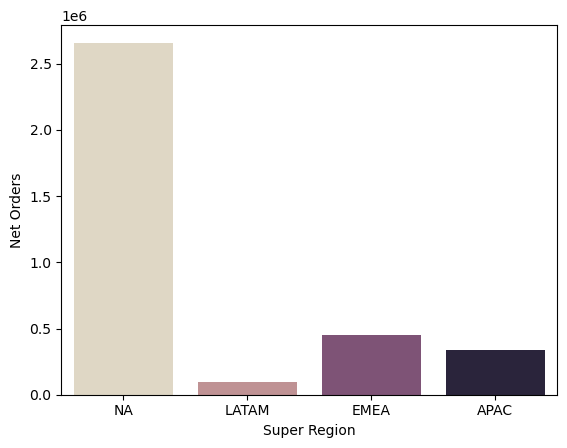

In [82]:
# How many orders between regions
region_orders = booking_data.pivot_table(values = 'Net Orders', index = 'Super Region', aggfunc=sum).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = region_orders.sort_values('Super Region', ascending = False), x = 'Super Region', y = 'Net Orders', palette = 'ch:s=-.2,r=.6')

<AxesSubplot:xlabel='Super Region', ylabel=' Net Gross Booking Value USD '>

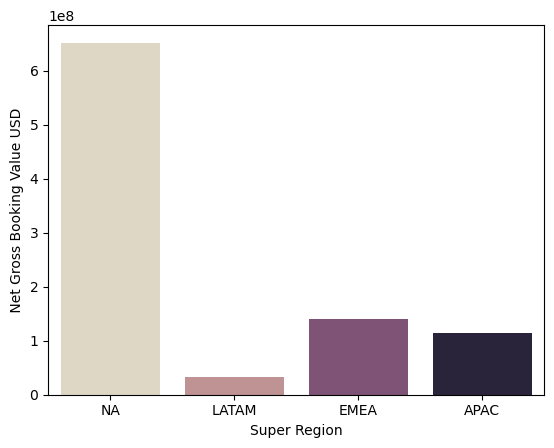

In [83]:
# How much revenue between regions
region_revenue = booking_data.pivot_table(values = ' Net Gross Booking Value USD ', index = 'Super Region', aggfunc=sum).reset_index()

sns.barplot(data = region_revenue.sort_values('Super Region', ascending = False), x = 'Super Region', y = ' Net Gross Booking Value USD ', palette = 'ch:s=-.2,r=.6')

Net Orders and gross value show a similar pattern where US is the popular area where bookings are made from

In [104]:
# Get the top 3 destinations for each super region within mobile platforms

# Get the different region names and create different tables with different super regions
region_names = list(pd.unique(booking_data['Super Region']))
region_dfs = []

for region in region_names:
    region_data = booking_data[booking_data['Super Region'] == region]
    region_dfs.append(region_data)

# Get the top 3 destinations chosen by customers
destination_region_rankings = []

for df in region_dfs:
    filtered_df = df[np.logical_or(df['Platform Type Name'] == 'Mobile App', df['Platform Type Name'] == 'Mobile Web')]
    destination_region = df.pivot_table(index = 'Property Country', values = 'Net Orders', aggfunc = sum).reset_index()
    total_bookings = sum(destination_region['Net Orders'])
    destination_region['Percentage'] = destination_region['Net Orders'] / total_bookings
    destination_region_rankings.append(destination_region.sort_values('Net Orders', ascending = False))

# Print the top 3 of each
for i in range(0, len(destination_region_rankings)):
    print(region_names[i])
    print(destination_region_rankings[i][:3])

APAC
    Property Country  Net Orders  Percentage
8          Australia       58366    0.174639
75             Japan       45349    0.135691
143      South Korea       43990    0.131624
EMEA
             Property Country  Net Orders  Percentage
183            United Kingdom      225533    0.502917
126                    Norway       34466    0.076856
184  United States of America       24438    0.054494
LATAM
             Property Country  Net Orders  Percentage
20                     Brazil       52234    0.563960
134  United States of America       18346    0.198078
62                      Italy        2731    0.029486
NA
             Property Country  Net Orders  Percentage
192  United States of America     2378567    0.894736
34                     Canada       30358    0.011420
114                    Mexico       23474    0.008830


## Growth

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2016-11-07'),
  Text(1, 0, '2016-11-14'),
  Text(2, 0, '2016-11-21'),
  Text(3, 0, '2016-11-28'),
  Text(4, 0, '2017-11-06'),
  Text(5, 0, '2017-11-13'),
  Text(6, 0, '2017-11-20'),
  Text(7, 0, '2017-11-27')])

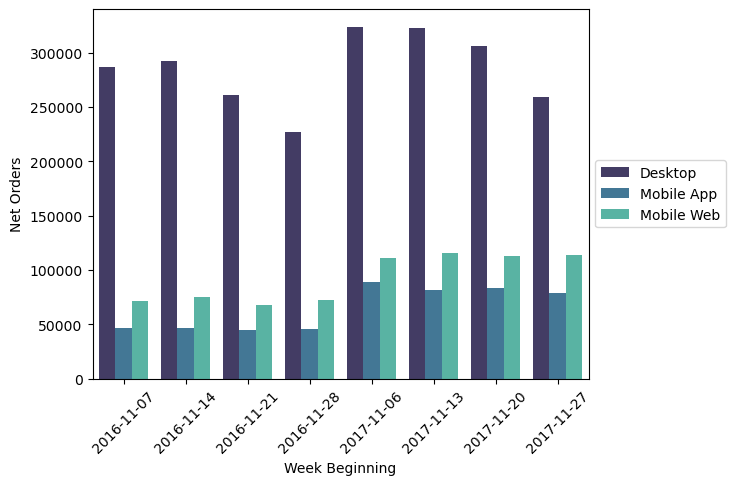

In [72]:
# Where are we seeing the most growth?
growth_data = booking_data.groupby(['Week Beginning', 'Platform Type Name'])[['Net Orders',' Net Gross Booking Value USD ']].sum().reset_index()

# Create a barplot
barplot = sns.barplot(x='Week Beginning', y='Net Orders', hue='Platform Type Name', data=growth_data, palette = 'mako')

# Change the layout of the legend
barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Change the labels so they don't have the time written on the plot
labels = [item.get_text() for item in barplot.get_xticklabels()]
labels = [item.replace('T00:00:00.000000000', '') for item in labels]

# Set the new labels and rotate them to make them clear
barplot.set_xticklabels(labels)
plt.xticks(rotation=45)

From the graph above, we can see there has been a growth in net bookings from 2016 to 2017 and while the desktop bookings have slowly decreased over time in 2017, the mobile bookings remain steady. Therefore, I believe it is worth investing more time into developing a more user friendly experience in holiday booking for mobile use.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2016-11-07'),
  Text(1, 0, '2016-11-14'),
  Text(2, 0, '2016-11-21'),
  Text(3, 0, '2016-11-28'),
  Text(4, 0, '2017-11-06'),
  Text(5, 0, '2017-11-13'),
  Text(6, 0, '2017-11-20'),
  Text(7, 0, '2017-11-27')])

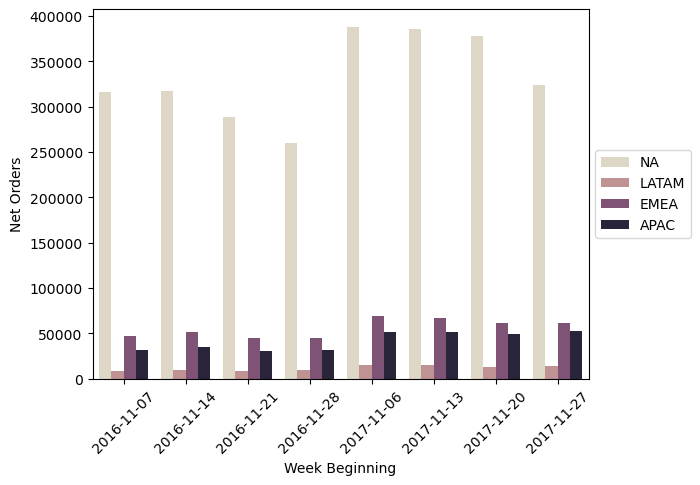

In [71]:
region_names = list(pd.unique(booking_data['Super Region']))

# Where are we seeing the most growth?
growth_data = booking_data.groupby(['Week Beginning', 'Super Region'])[['Net Orders',' Net Gross Booking Value USD ']].sum().reset_index().sort_values(['Super Region', 'Week Beginning'], ascending = [False, True])

# Create a barplot
growth_region_barplot = sns.barplot(x='Week Beginning', y='Net Orders', hue='Super Region', data=growth_data, palette = 'ch:s=-.2,r=.6')

# Change the layout of the legend
growth_region_barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Change the labels so they don't have the time written on the plot
labels2 = [item.get_text() for item in growth_region_barplot.get_xticklabels()]
labels2 = [string.replace('T00:00:00.000000000', '') for string in labels2]


# Set the new labels and rotate them to make them clear
growth_region_barplot.set_xticklabels(labels2)
plt.xticks(rotation=45)

## Evaluations

Due to the data only providing the net orders and net booking value, I was unable to make insightful results using significance tests and predictions for the future. The best data set to get the most insight from would be one where each row represents a booking/ cancellation.

Furthermore, there are actually only a few weeks of data are given for only two years, despite being a large dataset. This means that while we can analyse the differences over time, the analysis may lead to incorrect assumptions about sales and bookings overall. We also need to consider the fact that bookings may rise and decrease based on school holidays and peak times of the year, so a way to improve the dataset would be to have more data from the same month over several years.

There was no information on hotels, so I was unable to provide a clear answer on the aim 'ensure mobile users have acces to the best hotels' 